# Generación de números pseudoaleatorios

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Dice.jpg" width="300px" height="100px" />

**Referencias de la clase:**
- https://webs.um.es/mpulido/miwiki/lib/exe/fetch.php?id=amio&cache=cache&media=wiki:simt1b.pdf
- http://www.lmpt.univ-tours.fr/~nicolis/Licence_NEW/08-09/boxmuller.pdf

**Referencias de las librerías que usaremos:**
- http://www.numpy.org/
- https://matplotlib.org/

___
## 0. Introducción

- Los números aleatorios son la base esencial de la simulación de escenarios.
- Toda la aleatoriedad involucrada en el modelo se obtiene a partir de un generador de números aleatorios que produce una sucesión de valores que supuestamente son realizaciones de una secuencia de variables aleatorias independientes e idénticamente distribuidas.

*<font color = blue> Contar la historia barata de la lotería... </font>*

### 0.1 ¿Qué es un número pseudoaleatorio?

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.publicdomainpictures.net/pictures/50000/velka/random-numbers.jpg" width="300px" height="100px" />

- Es un número generado en un proceso que parece producir números al azar, pero no lo hace realmente.
- Las secuencias de números pseudoaleatorios no muestran ningún patrón o regularidad aparente desde un punto de vista estadístico, a pesar de haber sido generadas por un algoritmo completamente determinista, en el que las mismas condiciones iniciales producen siempre el mismo resultado.
- Por lo general, el interés no radica en generar un solo número aleatorio, sino muchos, reunidos en lo que se conoce como secuencia aleatoria.

### 0.2 ¿En qué se aplican?

- Modelado y simulación por computadora, estadística, diseño experimental. Normalmente, la entropía (aletoriedad) de los números que se generan actualmente basta para estas aplicaciones.
- Criptografía. Este campo sigue estando en constante investigación, y por tanto la generación de números aleatorios también.
- Asimismo, también destacan su uso en el llamado método de Montecarlo, con múltiples utilidades.
- Entre otros...

### 0.3 Funcionamiento básico

- Elegir una semilla inicial (condición inicial) $x_0$.
- Generar una sucesión de valores $x_n$ mediante la relación de recurrencia $x_n=T(x_{n-1})$.

> Generalmente, esta secuencia es de números pseudoaleatorios $\mathcal{U}(0,1)$.

- Finalmente, se genera un número pseudoaleatorio con distribución deseada, definido a través de alguna relación $u_n=g(x_n)$.
- Estas sucesiones son periódicas. Es decir, en algún momento ocurrirá que $x_j = x_i$ para algún $j > i$.

### 0.4 ¿Cuándo un generador de números pseudoaleatorios es bueno?

- La sucesión de valores que proporcione deberı́a asemejarse a una sucesión de realizaciones independientes de una variable aleatoria $\mathcal{U}(0, 1)$.
- Los resultados deben ser reproducibles, en el sentido de que comenzando con la misma semilla inicial, debe ser capaz de reproducir la misma sucesión. Esto para poder probar diferentes alrternativas bajo las mismas condiciones y/o poder depurar fallos en el modelo.
- La sucesión de valores generados debe tener un periodo no repetitivo tan largo como sea posible.

___
## 1. Métodos congruenciales para generación de números pseudoaleatorios $\mathcal{U}(0,1)$

- Introducidos por Lehmer en 1951.
- Son los principales generadores de números pseudoaleatorios utilizados hoy en día.

### 1.1 Descripción general del método

- Comienza con un valor inicial (semilla) $x_0$, y los valores subsiguientes, $x_n$ para $n \geq 1$, se obtienen recursivamente con la siguiente fórmula:
$$x_n = (ax_{n−1} + b) \mod m.$$
- En la fórmula de arriba $\text{mod}$ representa la operación residuo.
- Los enteros positivos $m$, $a$ y $b$ en la fórmula se denominan:
 - $0<m$ es el módulo,
 - $0<a<m$ es el multiplicador, y
 - $0\leq b <m$ es el incremento.
 - La semilla debe satisfacer $0\leq x_0<m$.
- Si $b = 0$, el generador se denomina multiplicativo.
- En caso contrario se llama mixto.

**Ejemplo**

Para tomar intuición con este método, probar a mano con los siguientes conjuntos de parámetros:
1. $m=9$, $a=5$, $b=1$, $x_0=1$.
2. $m=16$, $a=5$, $b=3$, $x_0=7$.

De acuerdo a lo anterior, ¿cómo son los números $x_i$?, ¿representa esto algún problema?, ¿cómo se podría solucionar?

<font color=red> Enunciar problemas con sus respectivas soluciones... </font>

En efecto, un generador congruencial queda completamente determinado por los parámetros $m$, $a$, $b$ y $x_0$.

**Proposición.** Los valores generados por un método congruencial verifican:

$$x_n = \left(a^n x_0+b\frac{a^n-1}{a-1}\right) \mod m.$$

<font color=blue> Verificar esto en el pizarrón. </font>

### 1.2 Programemos este método

De acuerdo a lo descrito arriba, quisiéramos programar una función que reciba:
- la semilla $x_0$,
- el multiplicador $a$,
- el incremento $b$,
- el módulo $m$, y
- la cantidad de elementos de la secuencia pseudoaleatoria requeridos $n$,

y que retorne la secuencia pseudoaleatoria de longitud $n$.

In [45]:
#### Importar la librería numpy... útil para el manejo de datos n-dimensionales (vectores)
import numpy as np

In [46]:
np.random.uniform(0,1,10)

array([0.96102754, 0.17157533, 0.15008503, 0.28438145, 0.59434372,
       0.0159678 , 0.45813175, 0.2561734 , 0.96387215, 0.79971634])

In [47]:
#### Escribir la función acá
def cong_method1(x0, a, b, m, n):
    x = [x0]
    for i in range(1,n+1): x.append((a * x[i-1] + b) % m)
    return np.array(x[1:])/m

**Ejemplo**

Probar con los conjuntos de parámetros anteriores:
1. $m=9$, $a=5$, $b=1$, $x_0=1$.
2. $m=16$, $a=5$, $b=3$, $x_0=7$.

Además,
- Para el conjunto de parámetros 1, probar con las semillas $x_0=5,8$.
- Para el conjunto de parámetros 2, probar con diferentes semillas.

In [48]:
#### Probar acá
x = cong_method1(8, 5, 1, 9, 15)
x

array([0.55555556, 0.88888889, 0.55555556, 0.88888889, 0.55555556,
       0.88888889, 0.55555556, 0.88888889, 0.55555556, 0.88888889,
       0.55555556, 0.88888889, 0.55555556, 0.88888889, 0.55555556])

In [49]:
x = cong_method1(2, 5, 3, 16, 20)
x

array([0.8125, 0.25  , 0.4375, 0.375 , 0.0625, 0.5   , 0.6875, 0.625 ,
       0.3125, 0.75  , 0.9375, 0.875 , 0.5625, 0.    , 0.1875, 0.125 ,
       0.8125, 0.25  , 0.4375, 0.375 ])

**Ejercicio**

Los ciclos *for* o *while* son un atentado contra la computación eficiente. Programar de forma vectorizada usando la fórmila:
$$x_n = \left(a^n x_0+b\frac{a^n-1}{a-1}\right) \mod m.$$

In [50]:
#### Escribir la función acá
def cong_method2(x0, a, b, m, n):
    x = [x0]
    for i in range(1,n + 1): x.append((a**i * x[0] + b*((a**i -1)/(a-1))) % m)
    return np.array(x[1:])/m

In [51]:
cong_method2(2, 5, 3, 16, 20)

array([0.8125, 0.25  , 0.4375, 0.375 , 0.0625, 0.5   , 0.6875, 0.625 ,
       0.3125, 0.75  , 0.9375, 0.875 , 0.5625, 0.    , 0.1875, 0.125 ,
       0.8125, 0.25  , 0.4375, 0.375 ])

Entonces vemos que la calidad de nuestro generador congruencial depende fuertemente de la elección de los parámetros, pues quisiéramos que los periodos sean lo más grandes posible ($m$).

Cuando el periodo de un generador congruencial coincide con el módulo $m$, lo llamaremos *generador de ciclo completo*. El periodo de este tipo de generadores es independiente de la semilla que utilicemos.

El siguiente Teorema nos da condiciones para crear generadores de ciclo completo:

**Teorema.** Un generador congruencial tiene periodo completo si y sólo si se cumplen las siguientes condiciones:
1. $m$ y $b$ son primos entre sı́.
2. Si $q$ es un número primo que divide a $m$, entonces $q$ divide a $a − 1$.
3. Si $4$ divide a m, entonces 4 divide a $a − 1$.

**Ejercicio**

Comprobar el teorema en el conjunto de parámetros 2.

### 1.3 Comentarios adicionales sobre el generador congruencial

Hasta ahora solo nos basamos en aspectos teóricos para ver si un generador es bueno. También hay aspectos computacionales...

En ese sentido los generadores multiplicativos son más eficientes que los mixtos porque se ahorran la operación de suma. Sin embargo, por el **Teorema** <font color=red>¿qué pasa con los generadores multiplicativos?</font>

De igual forma, una elección computacionalmente adecuada es $m=2^k$ (se elige m grande para tener periodos grandes). Con esta elección, y $k\geq2$, el generador tendrá periodo completo si y sólo si $b$ es impar y $1 = a \mod 4$.

Si se combina lo anterior (generador multiplicativo con $m=2^k$), obtenemos que el periodo máximo que se puede obtener es una cuarta parte de $m$, $\frac{2^k}{4}=2^{k-2}$ y se alcanza únicamente para $x_0$ impar y, $3 = a \mod 8$ o $5 = a \mod 8$.

Un generador multiplicativo muy utilizado, conocido como *RANDU*, tomaba $m = 2^{31}$ y $a = 2^{16} + 3$. Sin embargo, se ha demostrado que tiene propiedades estadı́sticas bastante malas.

Los generadores multiplicativos más famosos utilizados por IBM tomaban $m = 2^{31} − 1$ y $a = 7^5, 630360016$.

Pueden encontrar más información en este [enlace](https://en.wikipedia.org/wiki/Linear_congruential_generator).

- Se pueden hacer combinaciones de generadores y otros generadores más complicados...

**Ejemplo**

Tomar los parámetros $m=2^{31} − 1$, $a=1103515245$ y $b=12345$, y generar una secuencia pseudoaleatoria uniforme estándar de $n=10^4$ elementos.

Luego, dibujar el histograma (diagrama de frecuencias). ¿Corresponde lo obtenido con lo que se imaginaban?

In [52]:
#### Resolver acá
x = cong_method1(3, 1103515245, 12345, 2**31-1, 10**6)

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


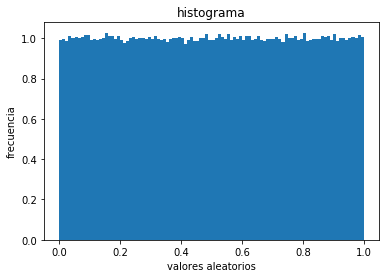

In [54]:
plt.hist(x, 100, normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('frecuencia')
plt.title('histograma')
plt.show()

**Ejemplo**

¿Cómo hacer para obtener secuencias pseudoaleatorias en $\mathcal{U}(a,b)$?

Realizar un código para esto. Hacer una prueba con los parámetros anteriormente tomados y dibujar el histograma para contrastar.

In [55]:
#### Resolver acá
a, b = 7, 10
xab = (b-a)*x+a

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


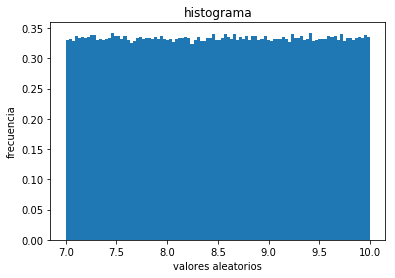

In [56]:
plt.hist(xab, 100, normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('frecuencia')
plt.title('histograma')
plt.show()

**Ejemplo**

Escribir una función que devuelva secuencias de números aleatorios $\mathcal{U}(0,1)$ usando los parámetros dados anteriormente y que use como semilla `time.time()`.

In [57]:
#### Resolver acá
import time
def randuni(n):
    return cong_method2(round(time.time()*10**7), 1103515245, 12345, 2**31-1, n+1)

In [58]:
randuni(10)

array([0.1172898 , 0.48634046, 0.20454009, 0.78973635, 0.64656347,
       0.56384094, 0.29512708, 0.38871189, 0.75774486, 0.1395358 ,
       0.93418798])

___
## 2. Método Box–Muller para generación de números pseudoaleatorios $\mathcal{N}(0,1)$

Teniendo dos secuencias de números pseudoaleatorios independientes e uniformemente distribuidos en el intervalo $\left[0,1\right]$ ($\mathcal{U}(0,1)$) es posible generar dos secuencias  de números pseudoaleatorios independientes y normalmente distribuidos con media cero y varianza unitaria ($\mathcal{N}(0,1)$).

Este método se conoce como el método Box–Muller.

Supongamos que $U_1$ y $U_2$ son variables aleatorias independientes que están uniformemente distribuidas en el intervalo $\left[0,1\right]$. Sean entonces:

$$X=R\cos(\theta)=\sqrt{-2\log(U_1)}\cos(2\pi U_2),$$

y

$$Y=R\sin(\theta)=\sqrt{-2\log(U_1)}\sin(2\pi U_2).$$

Entonces, $X$ y $Y$ son variables aleatorias independientes con una distribución normal estándar ($\mathcal{N}(0,1)$).

La derivación de esto se basa en la transformación del sistema cartesiano al sistema polar.

<font color=blue> Mostrar intuitivamente en el tablero. </font>

**Ejemplo**

Escribir una función que devuelva secuencias de números aleatorios $\mathcal{N}(0,1)$.

*Usar la función escrita anteriormente*

In [75]:
#### Resolver acá
from numpy import sqrt, log, sin, cos, pi
def randnorm(n):
    u1=cong_method1(round(time.time()*10**7), 1103515245, 12345, 2**31-1, n+1)
    u2=cong_method1(round(time.time()*10**7), 1103515245, 12345, 2**31-1, n+1)
    return np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)

In [76]:
randnorm(1)

array([-1.16401151, -1.12743805])

**Ejemplo**

Generar una secuencia pseudoaleatoria normal estándar de $n=10^4$ elementos.

Luego, dibujar el histograma (diagrama de frecuencias). ¿Corresponde lo obtenido con lo que se imaginaban?

In [77]:
#### Resolver acá
sigma = 1
mu = 0
x = sigma*randnorm(10**4)+mu

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


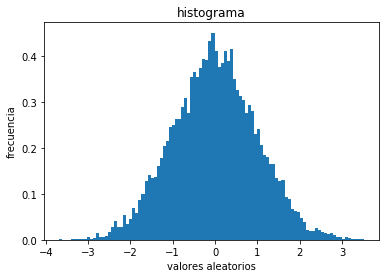

In [78]:
plt.hist(x, 100, normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('frecuencia')
plt.title('histograma')
plt.show()

**Ejemplo**

¿Cómo hacer para obtener secuencias pseudoaleatorias en $\mathcal{N}(\mu,\sigma)$?

Realizar un código para esto. Hacer una prueba y dibujar el histograma para contrastar.

In [19]:
#### Resolver acá
sigma = 2
mu = 10
x = sigma*randnorm(10**4)+mu

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


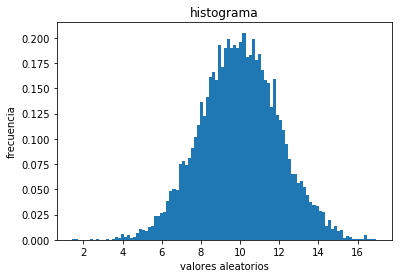

In [20]:
plt.hist(x, 100, normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('frecuencia')
plt.title('histograma')
plt.show()

Finalmente, mostrar que funciones de este tipo ya están en `numpy`. Ya sabemos como se obtienen.

In [21]:
x = np.random.uniform(7,10,10**6)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


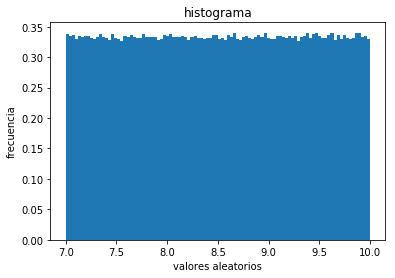

In [22]:
plt.hist(x, 100, normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('frecuencia')
plt.title('histograma')
plt.show()

In [23]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


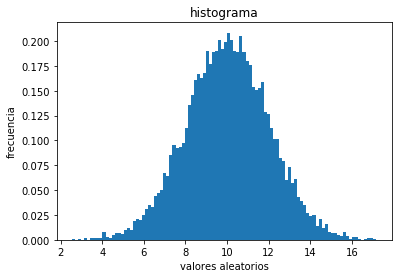

In [24]:
x = np.random.normal(10,2,10**4)

plt.hist(x, 100, normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('frecuencia')
plt.title('histograma')
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Xiuhcoatl.
</footer>